In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration (EDA)

In [5]:
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [21]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
train_df['Source'] = 'Train'
test_df['Source'] = 'Test'

In [27]:
test_df['Survived'] = np.nan

In [29]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)


In [31]:
combined_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [33]:
combined_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [35]:
combined_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


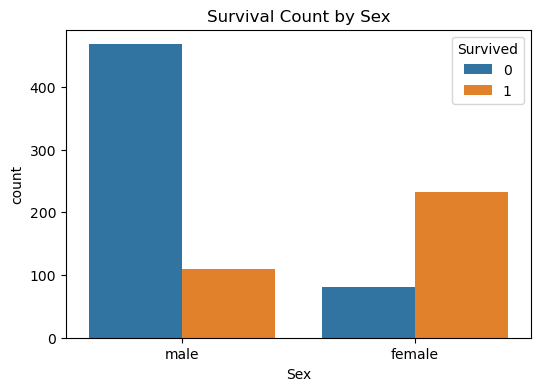

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.show()

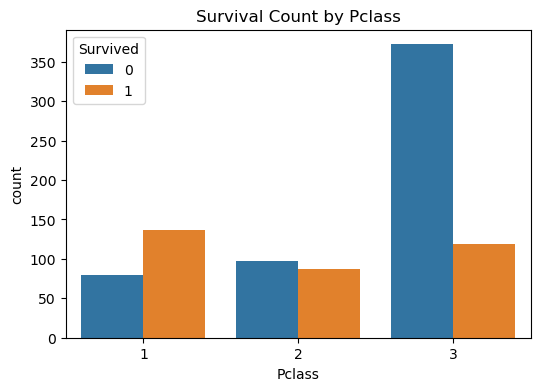

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Pclass')
plt.show()

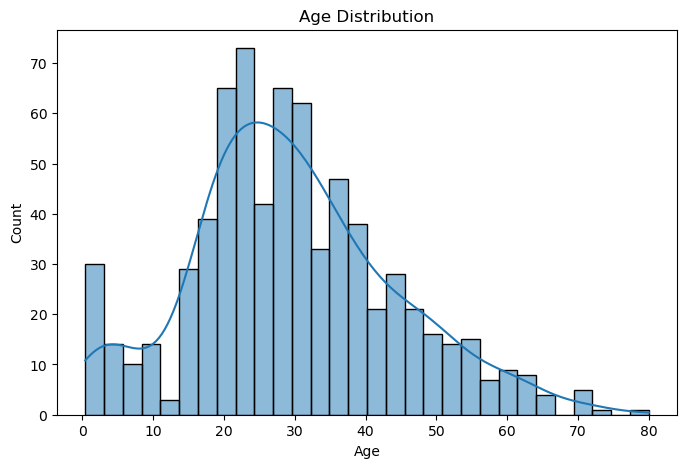

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

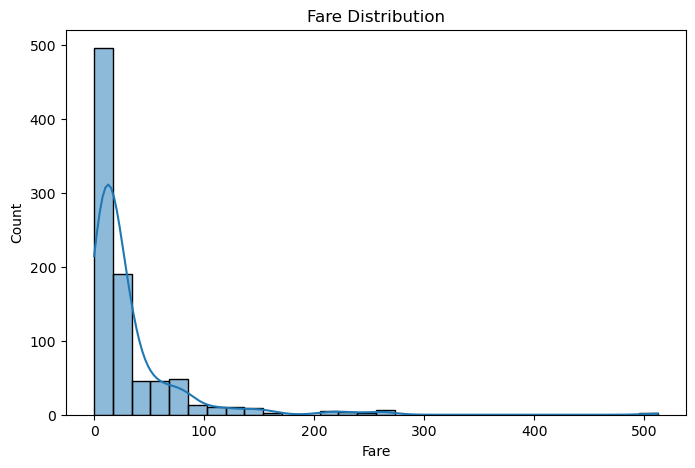

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['Fare'].dropna(), bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

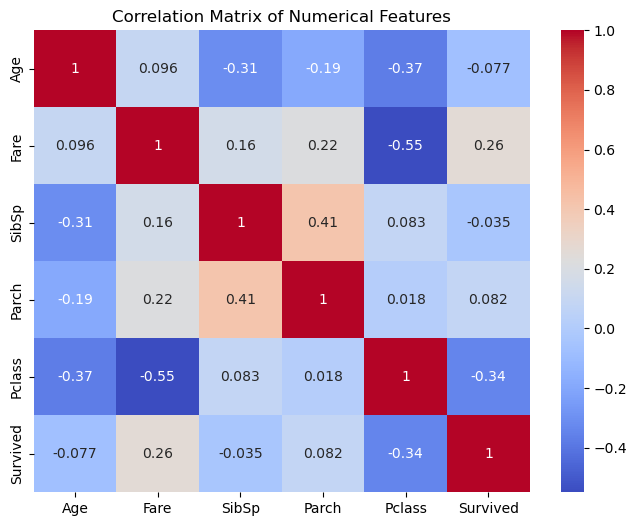

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[['Age', 'Fare', 'SibSp', 'Parch', 'Pclass', 'Survived']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Data Preprocessing

In [49]:
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)

In [51]:
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)


In [53]:
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)


In [55]:
combined_df['Has_Cabin'] = combined_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
combined_df.drop('Cabin', axis=1, inplace=True)

In [57]:
combined_df.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [59]:
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1 # +1 for the passenger themselves


In [61]:
combined_df['IsAlone'] = 0
combined_df.loc[combined_df['FamilySize'] == 1, 'IsAlone'] = 1


In [63]:
combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked'], drop_first=True)


In [65]:
combined_df 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Source,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,Train,0,2,0,True,False,True
1,2,1.0,1,38.0,1,0,71.2833,Train,1,2,0,False,False,False
2,3,1.0,3,26.0,0,0,7.9250,Train,0,1,1,False,False,True
3,4,1.0,1,35.0,1,0,53.1000,Train,1,2,0,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,Train,0,1,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,28.0,0,0,8.0500,Test,0,1,1,True,False,True
1305,1306,NaN,1,39.0,0,0,108.9000,Test,1,1,1,False,False,False
1306,1307,NaN,3,38.5,0,0,7.2500,Test,0,1,1,True,False,True
1307,1308,NaN,3,28.0,0,0,8.0500,Test,0,1,1,True,False,True


In [67]:
train_df_processed = combined_df[combined_df['Source'] == 'Train'].drop('Source', axis=1)
test_df_processed = combined_df[combined_df['Source'] == 'Test'].drop('Source', axis=1)


In [69]:
train_df_processed

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,0.0,3,22.0,1,0,7.2500,0,2,0,True,False,True
1,2,1.0,1,38.0,1,0,71.2833,1,2,0,False,False,False
2,3,1.0,3,26.0,0,0,7.9250,0,1,1,False,False,True
3,4,1.0,1,35.0,1,0,53.1000,1,2,0,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,0,1,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.0,0,0,13.0000,0,1,1,True,False,True
887,888,1.0,1,19.0,0,0,30.0000,1,1,1,False,False,True
888,889,0.0,3,28.0,1,2,23.4500,0,4,0,False,False,True
889,890,1.0,1,26.0,0,0,30.0000,1,1,1,True,False,False


In [71]:
test_df_processed

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
891,892,NaN,3,34.5,0,0,7.8292,0,1,1,True,True,False
892,893,NaN,3,47.0,1,0,7.0000,0,2,0,False,False,True
893,894,NaN,2,62.0,0,0,9.6875,0,1,1,True,True,False
894,895,NaN,3,27.0,0,0,8.6625,0,1,1,True,False,True
895,896,NaN,3,22.0,1,1,12.2875,0,3,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,28.0,0,0,8.0500,0,1,1,True,False,True
1305,1306,NaN,1,39.0,0,0,108.9000,1,1,1,False,False,False
1306,1307,NaN,3,38.5,0,0,7.2500,0,1,1,True,False,True
1307,1308,NaN,3,28.0,0,0,8.0500,0,1,1,True,False,True


In [79]:
X = train_df_processed.drop('Survived', axis=1)
y = train_df_processed['Survived']

In [81]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,2,0,True,False,True
1,2,1,38.0,1,0,71.2833,1,2,0,False,False,False
2,3,3,26.0,0,0,7.9250,0,1,1,False,False,True
3,4,1,35.0,1,0,53.1000,1,2,0,False,False,True
4,5,3,35.0,0,0,8.0500,0,1,1,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,1,True,False,True
887,888,1,19.0,0,0,30.0000,1,1,1,False,False,True
888,889,3,28.0,1,2,23.4500,0,4,0,False,False,True
889,890,1,26.0,0,0,30.0000,1,1,1,True,False,False


In [83]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [93]:
train_cols = X.columns
train_cols 

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin',
       'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [95]:
test_df_processed = test_df_processed.reindex(columns=train_cols, fill_value=0)
test_df_processed

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
891,892,3,34.5,0,0,7.8292,0,1,1,True,True,False
892,893,3,47.0,1,0,7.0000,0,2,0,False,False,True
893,894,2,62.0,0,0,9.6875,0,1,1,True,True,False
894,895,3,27.0,0,0,8.6625,0,1,1,True,False,True
895,896,3,22.0,1,1,12.2875,0,3,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,28.0,0,0,8.0500,0,1,1,True,False,True
1305,1306,1,39.0,0,0,108.9000,1,1,1,False,False,False
1306,1307,3,38.5,0,0,7.2500,0,1,1,True,False,True
1307,1308,3,28.0,0,0,8.0500,0,1,1,True,False,True


In [89]:
scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize'] # Pclass is often treated as categorical, but can be scaled too.


In [91]:
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [97]:
test_df_processed[numerical_cols] = scaler.transform(test_df_processed[numerical_cols])


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [105]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 12)
(179, 12)
(712,)
(179,)


# 3. Model Building and Training

In [111]:
log_model = LogisticRegression(random_state=42, solver='liblinear')
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

# 4. Model Evaluation

In [115]:
y_pred_val = log_model.predict(X_test)
y_pred_val 


array([0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0.])

In [117]:
y_proba_val = log_model.predict_proba(X_test)[:, 1] 
y_proba_val 

array([0.10251209, 0.0739428 , 0.15197457, 0.06445399, 0.71172639,
       0.54211659, 0.6294946 , 0.38005959, 0.44755324, 0.14939008,
       0.15062271, 0.11980654, 0.54222344, 0.21185049, 0.44282239,
       0.1993572 , 0.37608772, 0.10358454, 0.14157727, 0.66312361,
       0.08871733, 0.7284719 , 0.08534029, 0.47259429, 0.09710693,
       0.9482029 , 0.39027451, 0.42354018, 0.11867057, 0.1258138 ,
       0.09358873, 0.95211713, 0.10340111, 0.2300328 , 0.17860588,
       0.23038645, 0.18485259, 0.24113409, 0.16691428, 0.78453291,
       0.22485469, 0.96697932, 0.09317416, 0.74544618, 0.62542083,
       0.11199133, 0.11811566, 0.4500032 , 0.74830702, 0.78571528,
       0.92918976, 0.56828189, 0.69707678, 0.14833293, 0.82208949,
       0.10605595, 0.12675019, 0.48270847, 0.58336696, 0.23926841,
       0.6602358 , 0.61005077, 0.16361523, 0.0996069 , 0.57349129,
       0.55654033, 0.87374993, 0.09671334, 0.2676601 , 0.22032505,
       0.81075849, 0.13673485, 0.7277752 , 0.95576742, 0.13744

In [119]:
accuracy = accuracy_score(y_test, y_pred_val)
precision = precision_score(y_test, y_pred_val)
recall = recall_score(y_test, y_pred_val)
f1 = f1_score(y_test, y_pred_val)
roc_auc = roc_auc_score(y_test, y_proba_val)
conf_matrix = confusion_matrix(y_test, y_pred_val)

In [121]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.7989
Precision: 0.7619
Recall: 0.6957
F1-Score: 0.7273
ROC-AUC Score: 0.8399
Confusion Matrix:
[[95 15]
 [21 48]]


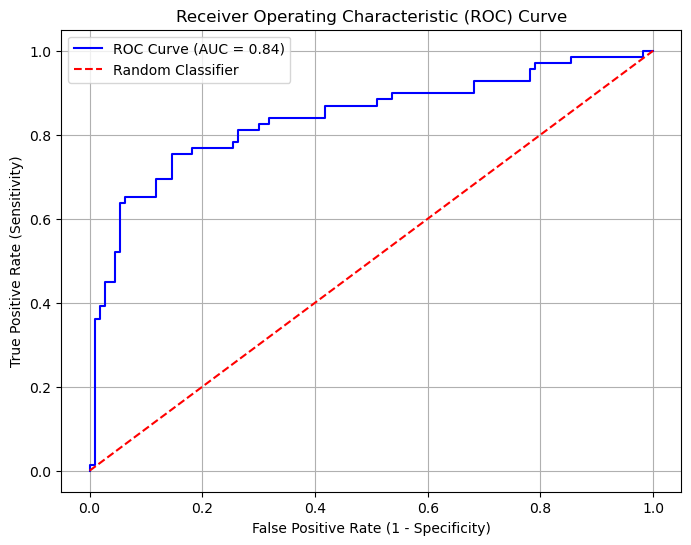

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_val)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# 5. Interpretation

In [127]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': log_model.coef_[0]})
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
print("Coefficients of the Logistic Regression Model (sorted by absolute value):")
print(coefficients)

Coefficients of the Logistic Regression Model (sorted by absolute value):
        Feature  Coefficient  Absolute_Coefficient
9      Sex_male    -2.411438              2.411438
6     Has_Cabin     1.020835              1.020835
1        Pclass    -0.598626              0.598626
8       IsAlone    -0.527582              0.527582
2           Age    -0.460650              0.460650
10   Embarked_Q     0.373270              0.373270
3         SibSp    -0.263388              0.263388
11   Embarked_S    -0.211325              0.211325
7    FamilySize    -0.210844              0.210844
5          Fare     0.113679              0.113679
4         Parch    -0.061706              0.061706
0   PassengerId     0.000404              0.000404


In [129]:
print("\nDiscussion on Feature Significance:")
print("Coefficients indicate how a feature impacts the log-odds of survival. Positive coefficients increase survival probability, negative decrease it.")
print("Features with larger absolute coefficients are more significant predictors.")
print("For example, 'Sex_male' often has a strong negative coefficient (lower survival for males), while 'Pclass' (lower class) also typically shows negative impact on survival.")



Discussion on Feature Significance:
Coefficients indicate how a feature impacts the log-odds of survival. Positive coefficients increase survival probability, negative decrease it.
Features with larger absolute coefficients are more significant predictors.
For example, 'Sex_male' often has a strong negative coefficient (lower survival for males), while 'Pclass' (lower class) also typically shows negative impact on survival.


In [131]:
model_filename = 'logistic_regression_model.pkl'
scaler_filename = 'scaler.pkl'
train_cols_filename = 'train_columns.pkl'

In [133]:
with open(model_filename, 'wb') as file:
    pickle.dump(log_model, file)
print(f"\nModel saved as '{model_filename}'")


Model saved as 'logistic_regression_model.pkl'


In [135]:
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved as '{scaler_filename}'")

Scaler saved as 'scaler.pkl'


In [137]:
with open(train_cols_filename, 'wb') as file:
    pickle.dump(train_cols, file)
print(f"Training columns saved as '{train_cols_filename}'")

Training columns saved as 'train_columns.pkl'


# Interview Questions:

